In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv("telco.csv")

In [38]:
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [39]:
df.tail()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
7038,2569-WGERO,Female,30,No,No,No,No,0,United States,California,...,0,1639.44,3039.53,5,Stayed,No,45,5306,NaN,NaN
7039,6840-RESVB,Male,38,No,No,Yes,Yes,2,United States,California,...,0,865.20,2807.47,3,Stayed,No,59,2140,NaN,NaN
7040,2234-XADUH,Female,30,No,No,Yes,Yes,2,United States,California,...,0,2135.52,9453.04,4,Stayed,No,71,5560,NaN,NaN
7041,4801-JZAZL,Female,32,No,No,Yes,Yes,2,United States,California,...,0,0.00,319.21,4,Stayed,No,59,2793,NaN,NaN
7042,3186-AJIEK,Male,44,No,No,No,No,0,United States,California,...,0,2043.36,8887.86,4,Stayed,No,38,5097,NaN,NaN


In [40]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [41]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [42]:
df['Contract'].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [43]:
df.shape

(7043, 50)

In [44]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [45]:
print(df.duplicated().sum())

0



Missing Values:
 Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service

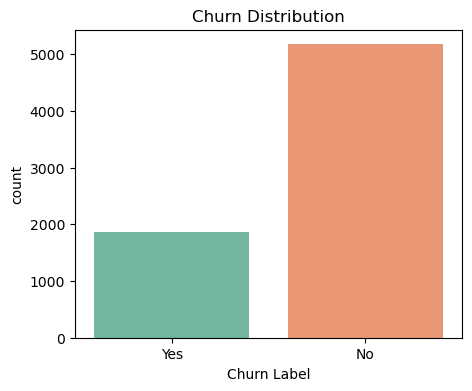

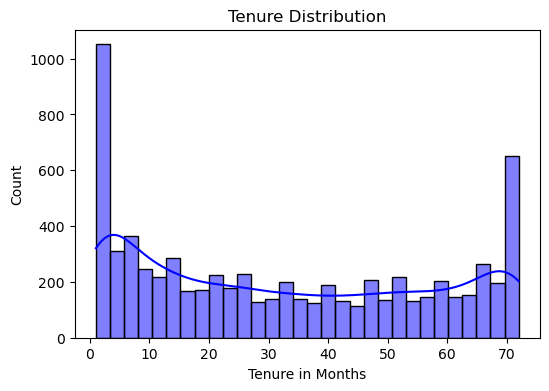

In [46]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Churn Label", data=df, hue="Churn Label", palette="Set2", legend=False)
plt.title("Churn Distribution")
plt.show()

# Example numeric column distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Tenure in Months"], kde=True, bins=30, color="blue")
plt.title("Tenure Distribution")
plt.show()

In [47]:
# Analyze numeric vs categorical columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Customer ID' in categorical_cols:
    categorical_cols.remove('Customer ID')
if 'Churn Label' in categorical_cols:
    categorical_cols.remove('Churn Label')

In [48]:
print(f"\nNumeric Columns: {numeric_cols}")
print(f"Categorical Columns (excluding Customer ID and Churn Label): {categorical_cols}")


Numeric Columns: ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Score', 'CLTV']
Categorical Columns (excluding Customer ID and Churn Label): ['Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason']


In [49]:
print("\nTarget Variable Distribution ('Churn Label'):")
print(df['Churn Label'].value_counts())
print(df['Churn Label'].value_counts(normalize=True) * 100)


Target Variable Distribution ('Churn Label'):
Churn Label
No     5174
Yes    1869
Name: count, dtype: int64
Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [50]:
# Convert 'Total Charges' to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

In [51]:
# --- 2. Data Preprocessing ---
print("\n--- 2. Data Preprocessing ---")

features = [
    'Gender', 'Senior Citizen', 'Married', 'Dependents', 'Tenure in Months',
    'Phone Service', 'Internet Service', 'Contract', 'Monthly Charge', 'Total Charges'
]
target = 'Churn Label'

X = df[features]
y = df[target].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_features = ['Tenure in Months', 'Monthly Charge', 'Total Charges']
categorical_features = [col for col in X.columns if col not in numerical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



--- 2. Data Preprocessing ---


In [52]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (5634, 10), Test shape: (1409, 10)


In [53]:
# --- 3. Model Building with SMOTE ---
print("\n--- 3. Model Building (with SMOTE) ---")

# Build Imbalanced Pipeline
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])


--- 3. Model Building (with SMOTE) ---


In [54]:
# Train the model
print("Training Logistic Regression model with SMOTE...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

Training Logistic Regression model with SMOTE...
Model training complete.


In [55]:
# Predictions
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
y_pred = model_pipeline.predict(X_test)

In [56]:
# --- 4. Evaluation ---
print("\n--- 4. Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")



--- 4. Evaluation ---
Accuracy: 0.7637
Precision: 0.5349
Recall: 0.8396
F1-Score: 0.6535
ROC-AUC: 0.8770


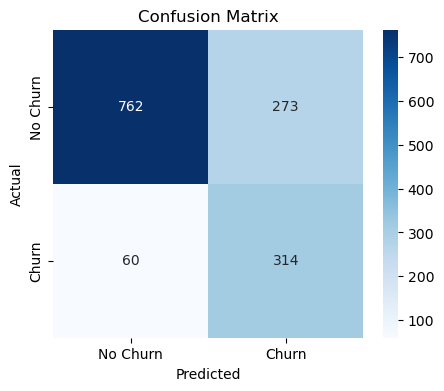

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [57]:
# --- 5. Feature Importance ---
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

coefficients = model_pipeline.named_steps['classifier'].coef_[0]
feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
feature_importance['Absolute_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

print("\nTop 10 Most Important Features for Churn Prediction (by absolute coefficient):")
print(feature_importance.head(10))


Top 10 Most Important Features for Churn Prediction (by absolute coefficient):
                    Feature  Coefficient  Absolute_Coefficient
17        Contract_Two Year    -1.415684              1.415684
15  Contract_Month-to-Month     1.328881              1.328881
0          Tenure in Months    -1.140485              1.140485
10           Dependents_Yes    -0.995381              0.995381
1            Monthly Charge     0.758190              0.758190
9             Dependents_No     0.718132              0.718132
12        Phone Service_Yes    -0.564347              0.564347
2             Total Charges     0.464919              0.464919
5         Senior Citizen_No    -0.391447              0.391447
11         Phone Service_No     0.287098              0.287098


In [60]:
import matplotlib.pyplot as plt
import numpy as np

def simulate_churn_predictions(model_pipeline, X_test, y_test, n_customers=20, random_state=None):
  
    # Select customers
    X_sample = X_test.sample(n=n_customers, random_state=random_state)
    y_sample = y_test.loc[X_sample.index]

    # Predictions
    y_sample_proba = model_pipeline.predict_proba(X_sample)[:, 1]
    y_sample_pred = model_pipeline.predict(X_sample)

    # Results DataFrame
    simulation_results = pd.DataFrame({
        "Customer_ID": X_sample.index,
        "Actual_Churn": y_sample.values,
        "Predicted_Churn": y_sample_pred,
        "Churn_Probability": y_sample_proba.round(4)
    })

    # Sort by churn probability (high → low risk)
    simulation_results = simulation_results.sort_values(by="Churn_Probability", ascending=False)

    # Print table
    print("\n--- Real-Time Simulation (Random Batch of Customers) ---")
    print(simulation_results)

    # --- Visualization ---
    plt.figure(figsize=(14,6))
    colors = ['red' if pred == 1 else 'green' for pred in simulation_results["Predicted_Churn"]]

    bars = plt.bar(simulation_results["Customer_ID"].astype(str), 
                   simulation_results["Churn_Probability"], 
                   color=colors)

    plt.axhline(0.5, color='blue', linestyle='--', label="Threshold = 0.5")
    plt.xlabel("Customer ID (Sorted by Risk)")
    plt.ylabel("Churn Probability")
    plt.title(f"Real-Time Churn Risk Ranking (Random {n_customers} Customers)")

    # Add labels
    for bar, actual, pred in zip(bars, simulation_results["Actual_Churn"], simulation_results["Predicted_Churn"]):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, 
                 f"A:{actual} P:{pred}", ha='center', fontsize=8, fontweight='bold')

    plt.legend(["Threshold = 0.5", "Predicted Churn (Red)", "Predicted No-Churn (Green)"])
    plt.ylim(0, 1.1)
    plt.show()

    return simulation_results



--- Real-Time Simulation (Random Batch of Customers) ---
    Customer_ID  Actual_Churn  Predicted_Churn  Churn_Probability
3          1368             1                1             0.8240
18         2265             1                1             0.7960
9          1256             1                1             0.7769
15         4783             0                1             0.6814
11         2840             0                1             0.6089
5          4900             0                1             0.5354
12         6167             0                1             0.5096
7          1495             1                1             0.5027
4          1000             0                0             0.4980
16         5341             0                0             0.4559
10         1698             1                0             0.3517
6          4061             0                0             0.3266
13         2747             0                0             0.3244
2          3994   

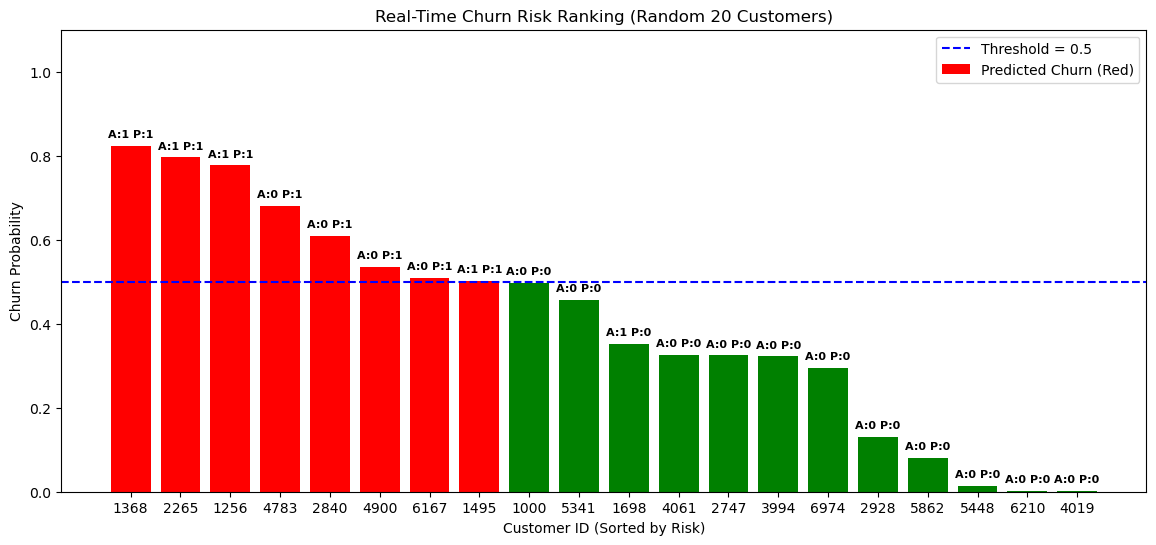

In [61]:
# Simulate for 20 customers
simulation_results = simulate_churn_predictions(model_pipeline, X_test, y_test, n_customers=20, random_state=42)
